# <font color=black>**Veri Ön İşleme**</font>

* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)
* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)
* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)
* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)

***
##  <font color=red>**Aykırı Gözlem Analizi**</font> <a id="aykiri_gozlem_analizi"></a>

***

**Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.**

#### **Aykırı Değer Nedir?**

Aykırılığı ifade eden nümerik değere **aykırı değer**(outliers) denir.

#### **Aykırı Değer Nedir?**

Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.

#### **Aykırı Değer Neye Sebep olur?**

**Genellenebilirlik** kaygısı ile okuşturulan **kural setlerini** ya da **fonksiyonları** yanıltır. **Yanlılığa** sebep olur.


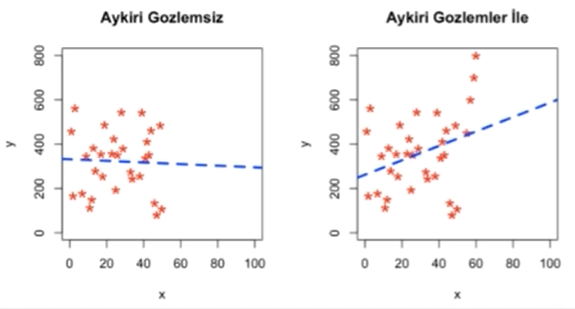

* Eğim negatif yönlü iken, aykırı gözlem yüzünden pozitif yöne kaymış.